# Multiple linear regression.

Unlike the simple linear regression model, the multiple linear regression model is defined as any linear regression model with at least two explanatory variables. But what do we do when we have several variables? This is what we will see in this chapter. And you will finally be able to measure all the power of linear regression despite its simplicity!


## Variables studied

First of all, we will load our dataset. This is a fake Dataset for the example. 

Note_yuri: Multiple Linear Regression Using Python and Scikit-learn
https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

In [1]:
import pandas as pd
df = pd.read_csv('./data/data_multi.csv')

In [2]:
df.head(3)

,x_1,x_2,y
0,1.054452,-1.070753,-81.464433
1,-0.362741,-0.634322,-78.752795
2,-0.854096,0.313068,2.218414


In [3]:
df.shape

(100, 3)

As you can see we now have 100 rows, 2 features and 1 target.

**Exercise :** Create the `X` and `y` variables and define which column will be the target and which column will be the feature. 
They must be of type `numpy.ndarray`. Our variable `X` has two dimensions this time.

In [4]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

In [5]:
#X

### Relationship between variables

To represent a dataset that has two features, we can use 3D visualization.

**Exercise :** Use a 3D matplotlib (or other) graph to view the dataset. 

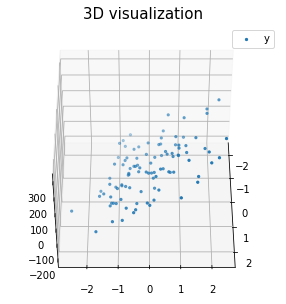

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(10,5))
ax = plt.subplot(111, projection="3d") # elev=48, azim=134
ax.scatter(X[:, 0], X[:, 1], y, label ='y', s = 5)
ax.set_title("3D visualization", fontsize=15)
ax.legend()
ax.view_init(45, 0)
plt.show()

If you change the camera angle, you should come across something that looks like this: 

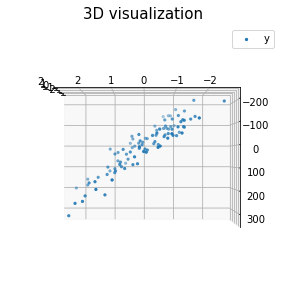

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(10,5))
ax = plt.subplot(111, projection="3d") # elev=48, azim=134
ax.scatter(X[:, 0], X[:, 1], y, label ='y', s = 5)
ax.set_title("3D visualization", fontsize=15)
ax.legend()
ax.view_init(180, 180)   # change the camera angle
plt.show()

If you change the camera angle, you should come across something that looks like this: 
<img src="./assets/3dplot.png" />

This appears to be a positive linear correlation. What do you say?  


If our dataset has more than two dimensions, then we won't be able to display it in 3D. Unfortunately for us, the human being can only perceive 3 dimensions. In this case, we will have no other choice than to display one scatter plot per variable.

And it is there that we realize that the linear regression may be very simple, as soon as we go beyond 3 dimensions, the human being will hardly be able to visualize all the data while the machines are doing very well.

**Exercise :** Create a scatter plot for each variable with respect to the target. You may use  `plt.tight_layout()` after plotting if the graph is too cramped.

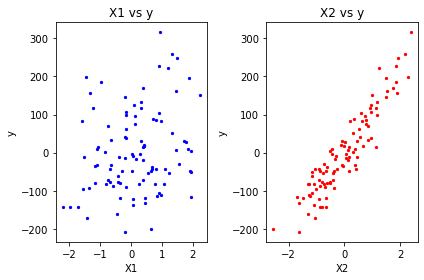

In [12]:
import numpy as np
x = np.linspace(-3, 3, 300)
plt.subplot(121)  # 1 rows, 2 columns, 1st subplot = top left
plt.scatter(X[:, 0], y, label ='y', s = 5, color='blue')  #s: scale of each point
plt.title("X1 vs y")
plt.xlabel("X1")
plt.ylabel("y")

plt.subplot(1, 2, 2)  # 1 rows, 2 columns, 2nd subplot = top right
plt.scatter(X[:, 1], y, label ='y', s = 5, color='red')  #s: scale of each point
plt.title("X2 vs y")
plt.xlabel("X2")
plt.ylabel("y")
plt.tight_layout()


**Exercise :** Show correlation coefficients. 

In [13]:
import numpy as np
r = np.corrcoef(X[:, 0].T, y.T)
r

array([[1.        , 0.23565037],
       [0.23565037, 1.        ]])

In [14]:
# OR (the same result above)
r = np.corrcoef(X[:, 0], y)
r

array([[1.        , 0.23565037],
       [0.23565037, 1.        ]])

In [11]:
import numpy as np
r = np.corrcoef(X[:, 1].T, y.T)
r

array([[1.        , 0.93029924],
       [0.93029924, 1.        ]])

In [12]:
correlation = df.corr()
correlation

,x_1,x_2,y
x_1,1.000000,-0.024005,0.235650
x_2,-0.024005,1.000000,0.930299
y,0.235650,0.930299,1.000000


### Split the dataset

You now know the process!

**Exercise :** Import `train_test_split` from `sklearn` and split the dataset and create the variables `X_train`, `X_test`, `y_train`, `y_test`.

In [15]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##  Load and fit the model (with Sklearn)

How to use `sklearn` now with multiple features ? Well, it's simple, you don't change anything. `sklearn` takes care of everything for you.

1. Import `LinearRegression` from `sklearn`
2. Create a `regressor` variable and instantiate your `LinearRegression` class.
3. Train your model with `X_train` and `y_train`.
4. Display the score of your model with `X_train` and `y_train`.
5. Use the predict method of your model on your test dataset (`X_test`).
6. Display the score of your model with `X_test` and `y_test`.

In [16]:
# 1.Import `LinearRegression` from `sklearn`
from sklearn.linear_model import LinearRegression

# 2.Create a `regressor` variable and instantiate your `LinearRegression` class
# create an object of that class, which is the linear regression model
lr = LinearRegression()   

# 3. Train your model with `X_train` and `y_train`
# use the fit method to 'fit' the model to our dataset
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# 4.Display the score of your model with `X_train` and `y_train`.
lr.score(X_train, y_train)

0.9255819294651559

In [18]:

# 5.Use the predict method of your model on your test dataset (`X_test`)
y_pred = lr.predict(X_test)  # test the model with the testing dataset
#y_pred

In [19]:
# 6.Display the score of your model with `X_test` and `y_test`
lr.score(X_test, y_test)

0.9418412685059916

And voilà !

## From Scratch 
You will see that with matrices, it doesn't change much in the way of proceeding. Matrix writing, moreover, remains the same as simple regression. 

### Transform to matrix

$$
\\ Y = X \cdot \theta \\
$$
The $Y$ vector is the same too
$$ Y =
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
$$

The $X$ matrix will have as many dimensions as there are features +1  (n+1)

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, ..., x^{(m)}_{n}, 1\\
x^{(2)}_1, x^{(2)}_2, ..., x^{(m)}_{n}, 1\\
x^{(3)}_1, x^{(3)}_2, ..., x^{(m)}_{n}, 1\\
x^{(m)}_1,x^{(m)}_2, ..., x^{(m)}_{n}, 1\\
\end{bmatrix}
$$

The theta vector will have as many lines as there are parameters +1 (for the constant). 
$$ \theta =
\begin{bmatrix}
a\\
b\\
c\\
... \\
\end{bmatrix}
$$

For our case with our dataset, we can write it like this: 

$$
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
=
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, 1\\
x^{(2)}_1, x^{(2)}_2, 1\\
x^{(3)}_1, x^{(3)}_2, 1\\
x^{(m)}_1,x^{(m)}_2,  1\\
\end{bmatrix}
\cdot
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
$$

**Exercise :** Create a variable `X` which contains a matrix of shape `(100,3)` with two column's filled with values of our dataframe and then another one with 1's.

In [20]:
#Create a variable `X` which contains a matrix of shape (30,2)
X = df[['x_1', 'x_2']].to_numpy()
X = np.c_[np.ones((len(X),1)),X]  #np.c_ Translates slice objects to concatenation along the second axis

In [23]:
y = df[['y']].to_numpy()
y.shape
type(y)

numpy.ndarray

**Exercise :** Check that your matrix is of shape `(100,3)`. 

In [22]:
X.shape

(100, 3)

**Exercise :** Create the theta vector with three random values. Your vector must be of shape 
`(3,1)`.

In [24]:
#2.Create the `theta` variable
theta = np.random.randn(3,1)   #Return a sample (or samples) from the 'standard normal' distribution
theta.shape

(3, 1)

## Create and fit the model
### Define your model

**Exercise :** Create a `model` function that receives as parameter `X` and `theta`. The function must return the computed predictions `y_pred`. This is exactly the same model as last time. 

In [25]:
def model(X, theta):
    F = np.dot(X, theta)
    return F
    
y_pred = model(X, theta)

In [26]:
y_pred.shape

(100, 1)

### Cost function

Well we have the model, the $\theta$ vector, the $X$ matrix. What are we missing? The cost function of course!
And you know what? This too is exactly the same MSE function from last time. 

$$MSE(\theta) = \frac {1}{2m}  \sum (X \cdot \theta - Y)^2$$

**Exercise :** Create a MSE function that receives as parameters `X`, `y` and `theta` using the example above.

In [27]:
def  MSE(theta,X,y):   # cost function
    '''
    Calculates the cost for given X and y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = features
    y     = target
    '''
    
    m = len(y)
    
    y_pred = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(y_pred-y))
    return cost

In [28]:
cost = MSE(theta, X, y)
cost   
# We will now use gradient descent to minimize this value

58569785.24299877

### Gradient descent
It's time to find the minimum of our function. Well again, nothing changes compared to the last time. 

$$ \frac {\partial MSE(\theta) }{\partial \theta}  = \frac {1}{m} X^T \cdot (X \cdot \theta - Y)$$

**Exercise :** Create a `grad` function that receives as parameter `X`, `y`, `theta`.

In [29]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)


**Exercise :**

1. Create a `gradient_descent` function that receives as parameter `X`, `y`, `theta`, `learning_rate`, `n_iterations`.
2. In the function, create a variable `cost_history` with a matrix filled with 0 and which has a length of `n_iterations`. We will use it to display the histogram of the model learning process.
3. Create a loop that iterates up to `n_iterations`.
4. In the loop, update `theta` with the formula of the gradient descent (the example above).
5. In the loop, update `cost_history[i]` with the values of `MSE(X,y,theta)`.
6. return `theta` and `cost_history`.

In [30]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta= Vector of thetas np.random.randn(features,1)
    learning_rate 
    n_iterations = no of iterations
    
    Returns the final theta vector and array of cost history over number of iterations
    '''
    # Initializing cost_history with zeroes
    cost_history = np.zeros(n_iterations) # to display the plot of the model learning process

    for it in range(n_iterations):
        
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[it]  = MSE(theta,X,y)
        
    return theta, cost_history 

### Train your model 

**Exercise :** Create variables `n_iterations` and `learning_rate`.

In [32]:
learning_rate =0.01
n_iterations = 1000


**Exercise:** Create variables `theta_final`, `cost_history` and call `gradient_descent()`.

In [33]:
theta_final = theta[0][0],theta[1][0],theta[2][0]

# running Gradient Descent
theta_final, cost_history = gradient_descent(X,y,theta,learning_rate,n_iterations)  

print('Final Theta 0 value: {:0.3f}\nFinal Theta 1 value: {:0.3f}\nFinal Theta 2 value: {:0.3f}'.format(theta[0][0],theta[1][0], theta[2][0]))
print('Final cost_history/MSE:  {:0.3f}'.format(cost_history[-1]))

Final Theta 0 value: 1.040
Final Theta 1 value: 0.177
Final Theta 2 value: 0.339
Final cost_history/MSE:  4006143.644


**Exercise :** 
Create a `predictions` variable that contains `model(X, theta_final)`.



In [34]:
def model(X, theta_final):
     #return np.dot(X, theta_final)  # it is the same
     return X.dot(theta_final)

predictions = model(X, theta_final)

In [37]:
#print(predictions)

In [44]:
y.shape

(100, 1)

In [45]:
X[:,1].shape

(100,)

In [46]:
predictions.shape

(100, 1)

**Exercise :** Plot your predictions in 3D and the true values of the dataset.

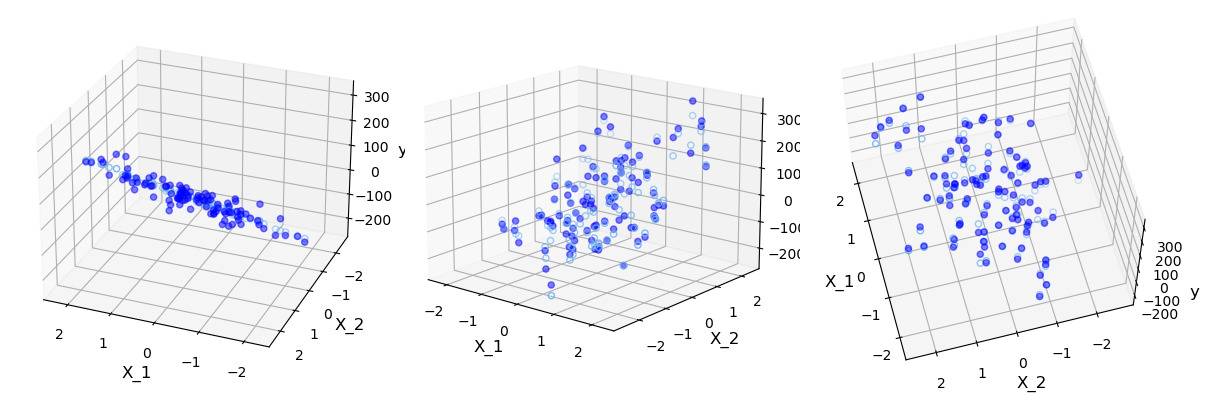

In [78]:
import matplotlib.pyplot as plt
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.scatter(X[:,1], X[:,2], y, color='blue', zorder=15, marker='o', alpha=0.5)  #linestyle='none'
    ax.scatter(X[:,1], X[:,2], predictions, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')  #color='red', facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0'
    ax.set_xlabel('X_1', fontsize=12)
    ax.set_ylabel('X_2', fontsize=12)
    ax.set_zlabel('y', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)


fig.tight_layout()

![plot.gif](./gif.gif)

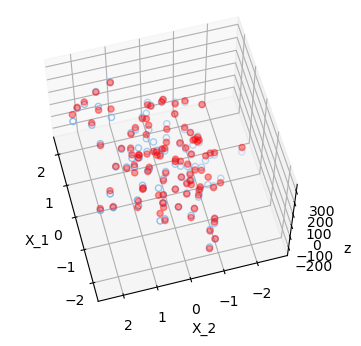

In [86]:
import matplotlib.pyplot as plt
plt.style.use('default')

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, projection='3d')
axes = [ax]

for ax in axes:
    ax.scatter(X[:,1], X[:,2], y, color='red', zorder=15, marker='o', alpha=0.4)  #linestyle='none'
    ax.scatter(X[:,1], X[:,2], predictions, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')  #color='red', facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0'
    ax.set_xlabel('X_1', fontsize=10)
    ax.set_ylabel('X_2', fontsize=10)
    ax.set_zlabel('z', fontsize=10)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax.view_init(elev=60, azim=165)

**Exercise :** Plot `cost_history`.

Text(0.5, 1.0, 'MSE vs Iterations Analysis')

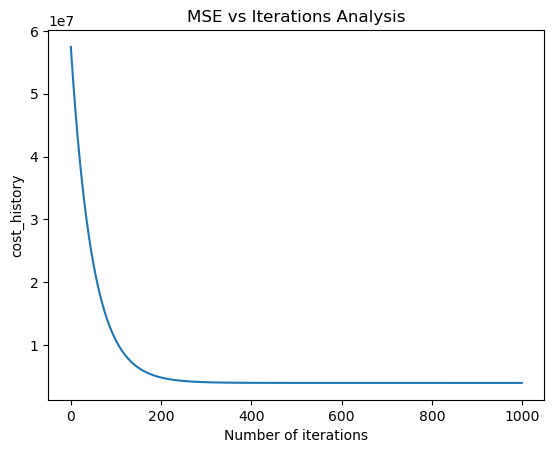

In [79]:
# Plotting Line Plot for Number of Iterations vs MSE
plt.plot(range(n_iterations),cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('cost_history')
plt.title('MSE vs Iterations Analysis')

Note_yuri: On this plot, we can see that after 400 iterations, the model no longer learns and becomes constant. We can thus redefine the maximum number of iterations to 400.

### Evaluation

In [80]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [81]:
coef_determination(y, predictions)

0.9320499571496657

In [82]:
#make sure:
from sklearn.metrics import r2_score 

r2 = r2_score(y, predictions) 
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.9320499571496657


### Congratulations !

You are now able to create a multiple variable regression model from scratch, well, from the matrix!

<img src="https://media.giphy.com/media/W9lzJDwciz6bS/giphy.gif">

Resources:  
  
[Coding Linear Regression from Scratch](https://towardsdatascience.com/coding-linear-regression-from-scratch-c42ec079902)


[Multiple Linear Regression and Visualization in Python](https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python)
  
  
check:  
[Multiple Linear Regression Using Python and Scikit-learn](https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/)

to learn
[Gradient Descent in Python](https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f)